# Exercises: Instability of Parameter Estimates - Answer Key

## Lecture Link

This exercise notebook refers to this lecture. Please use the lecture for explanations and sample code.

https://www.quantopian.com/lectures#Instability-of-Estimates

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [github.com/quantopian/research_public](https://github.com/quantopian/research_public)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.stattools import jarque_bera

# Set a seed so we can play with the data without generating new random numbers every time
np.random.seed(321)


# Exercise 1: Sample Size vs. Standard Deviation

Using the below normal distribution with mean 100 and standard deviation 50, find the means and standard deviations of  samples of size 5, 25, 100, and 500.

In [2]:
POPULATION_MU = 100
POPULATION_SIGMA = 25
sample_sizes = [5, 25, 100, 500]

#Your code goes here

for i in range(len(sample_sizes)):
    sample = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_sizes[i])
    row = 'Mean',(i+1),':', np.mean(sample),'Std',(i+1),':',np.std(sample)
    print ("{} {}{} {:<10f}    {} {}{} {}").format(*row)
    
print "\nAs sample size increases, the mean and standard deviation approach those of the population. However, even at the 500 sample level the sample mean is not the same as the population mean."


Mean 1: 99.089982     Std 1: 24.4641171659
Mean 2: 94.706474     Std 2: 20.1246310051
Mean 3: 100.107503    Std 3: 24.6748889015
Mean 4: 100.661661    Std 4: 24.6649605309

As sample size increases, the mean and standard deviation approach those of the population. However, even at the 500 sample level the sample mean is not the same as the population mean.


# Exercise 2: Instability of Predictions on Mean Alone

## a. Finding Means

Find the means of the following three data sets $X$, $Y$, and $Z$.

In [3]:
X = [ 31.,   6.,  21.,  32.,  41.,   4.,  48.,  38.,  43.,  36.,  50., 20.,  46.,  33.,   8.,  27.,  17.,  44.,  16.,  39.,   3.,  37.,
        35.,  13.,  49.,   2.,  18.,  42.,  22.,  25.,  15.,  24.,  11., 19.,   5.,  40.,  12.,  10.,   1.,  45.,  26.,  29.,   7.,  30.,
        14.,  23.,  28.,   0.,  34.,   9.,  47.]
Y = [ 15.,  41.,  33.,  29.,   3.,  28.,  28.,   8.,  15.,  22.,  39., 38.,  22.,  10.,  39.,  40.,  24.,  15.,  21.,  25.,  17.,  33.,
        40.,  32.,  42.,   5.,  39.,   8.,  15.,  25.,  37.,  33.,  14., 25.,   1.,  31.,  45.,   5.,   6.,  19.,  13.,  39.,  18.,  49.,
        13.,  38.,   8.,  25.,  32.,  40.,  17.]
Z = [ 38.,  23.,  16.,  35.,  48.,  18.,  48.,  38.,  24.,  27.,  24., 35.,  37.,  28.,  11.,  12.,  31.,  -1.,   9.,  19.,  20.,   0.,
        23.,  33.,  34.,  24.,  14.,  28.,  12.,  25.,  53.,  19.,  42., 21.,  15.,  36.,  47.,  20.,  26.,  41.,  33.,  50.,  26.,  22.,
        -1.,  35.,  10.,  25.,  23.,  24.,   6.]

#Your code goes here

print "Mean X: %.2f"% np.mean(X)
print "Mean Y: %.2f"% np.mean(Y)
print "Mean Z: %.2f"% np.mean(Z)


Mean X: 25.00
Mean Y: 24.69
Mean Z: 25.61


## b. Checking for Normality

Use the `jarque_bera` function to conduct a Jarque-Bera test on $X$, $Y$, and $Z$ to determine whether their distributions are normal. 

In [4]:
#Your code goes here

Xp = jarque_bera(X)[1]
Yp = jarque_bera(Y)[1]
Zp = jarque_bera(Z)[1]

print Xp, Yp, Zp

if Xp < 0.05:
    print 'The distribution of X is likely normal.'
else:
    print 'The distribution of X is likely not normal.'
    
if Yp < 0.05:
    print 'The distribution of Y is likely normal.'
else:
    print 'The distribution of Y is likely not normal.'
    
if Zp < 0.05:
    print 'The distribution of Z is likely normal.'
else:
    print 'The distribution of Z is likely not normal.'


0.216026379492 0.25028131217 0.866907001763
The distribution of X is likely not normal.
The distribution of Y is likely not normal.
The distribution of Z is likely not normal.


## c. Instability of Estimates

Create a histogram of the sample distributions of $X$, $Y$, and $Z$ along with the best estimate/mean based on the sample.

All three datasets have a similar mean, but have very different distributions. Mean alone is very non-informative about what is going on in data, and should not be used alone as an estimator.


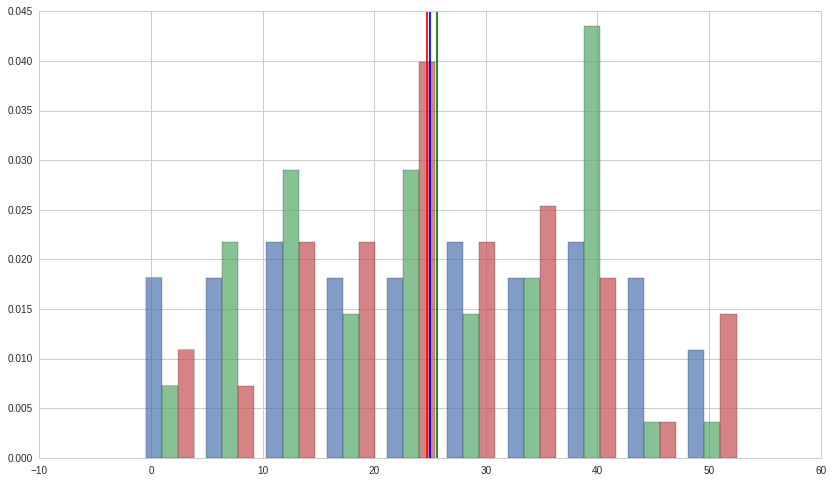

In [5]:
#Your code goes here

plt.hist([X, Y, Z], normed=1, histtype='bar', stacked=False, alpha = 0.7);
plt.axvline(np.mean(X));
plt.axvline(np.mean(Y), c='r');
plt.axvline(np.mean(Z), c='g');

print "All three datasets have a similar mean, but have very different distributions. Mean alone is very non-informative about what is going on in data, and should not be used alone as an estimator." 


# Exercise 3: Sharpe Ratio Window Adjustment

## a. Effect on Variability

Just as in the lecture, find the mean and standard deviation of the running sharpe ratio for THO, this time testing for multiple window lengths: 300, 150, and 50. Restrict your mean and standard deviation calculation to pricing data up to 200 days away from the end.

In [6]:
def sharpe_ratio(asset, riskfree):
    return np.mean(asset - riskfree)/np.std(asset - riskfree)

start = '2010-01-01'
end = '2015-01-01'

treasury_ret = get_pricing('BIL', fields='price', start_date=start, end_date=end).pct_change()[1:]
pricing = get_pricing('THO', fields='price', start_date=start, end_date=end)
returns = pricing.pct_change()[1:]

#Your code goes here

for window in [50, 150, 300]:
    running_sharpe = [sharpe_ratio(returns[i-window+10:i], treasury_ret[i-window+10:i]) for i in range(window-10, len(returns))]
    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])
    
    row = 'Sharpe Mean',(window),':', mean_rs,'Std', window,':',std_rs
    print ("{} {:>3}{} {:<11f}    {:>5} {:>3}{} {}").format(*row)
    
print "As we increase the length of the window, the variability of the running sharpe ratio decreases." 


Sharpe Mean  50: 0.041578         Std  50: 0.152672986316
Sharpe Mean 150: 0.045063         Std 150: 0.0708117281461
Sharpe Mean 300: 0.042417         Std 300: 0.041788831424
As we increase the length of the window, the variability of the running sharpe ratio decreases.


## b. Out-of-Sample Instability

Plot the running sharpe ratio of all three window lengths, as well as their in-sample mean and standard deviation bars.

/usr/local/lib/python2.7/dist-packages/pandas/tseries/base.py:192: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  val = getitem(key)


Despite the longer window Sharpe ratios having less variability, they are still unpredictable with repect to just the mean. But within the context of the standard deviation the mean has more predictive value, as we see that even in the out-of-sample periods the ratios of all window lengths stay mainly within 1 standard deviation of the mean.


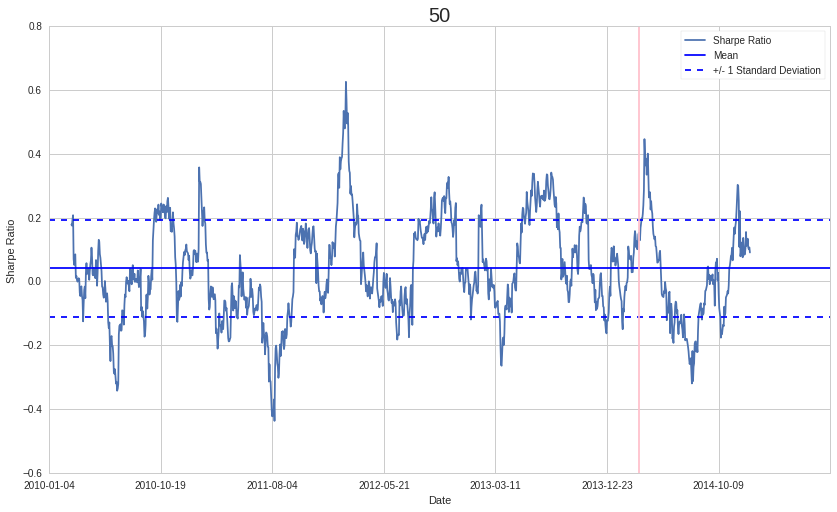

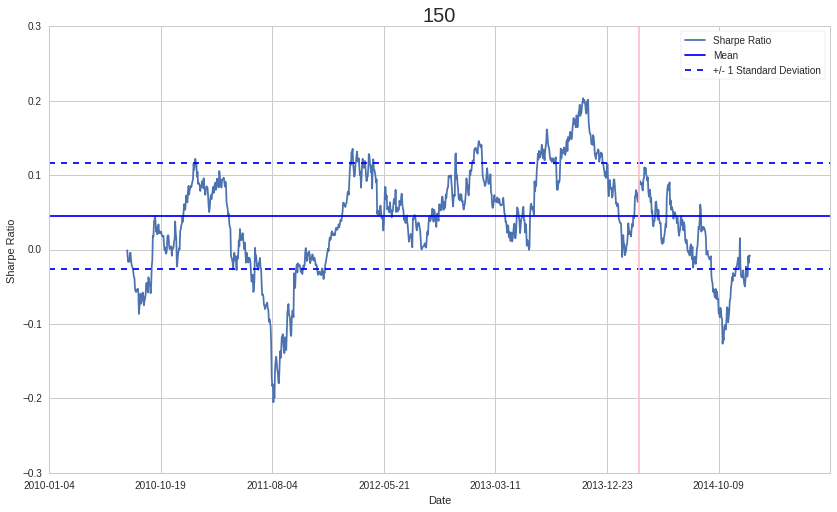

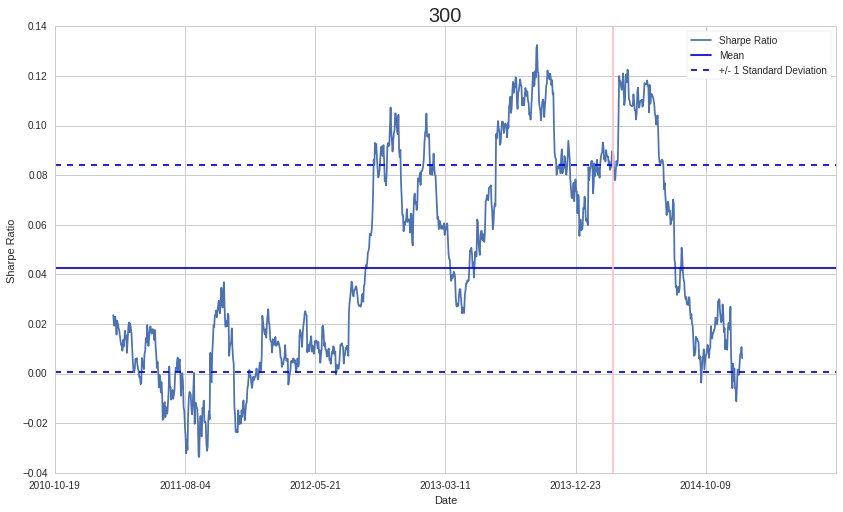

In [7]:
#Your code goes here

for window in [50, 150, 300]:
    running_sharpe = [sharpe_ratio(returns[i-window+10:i], treasury_ret[i-window+10:i]) for i in range(window-10, len(returns))]
    mean_rs = np.mean(running_sharpe[:-200])
    std_rs = np.std(running_sharpe[:-200])
    
    _, ax2 = plt.subplots()
    
    ax2.plot(range(window-10, len(returns)), running_sharpe)
    ticks = ax2.get_xticks()

    ax2.set_xticklabels([pricing.index[i].date() for i in ticks[:-1]])
    
    ax2.axhline(mean_rs)
    ax2.axhline(mean_rs + std_rs, linestyle='--')
    ax2.axhline(mean_rs - std_rs, linestyle='--')
    
    ax2.axvline(len(returns) - 200, color='pink');
    plt.title(window, fontsize = 20)
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
    plt.legend(['Sharpe Ratio', 'Mean', '+/- 1 Standard Deviation'])

    
print "Despite the longer window Sharpe ratios having less variability, they are still unpredictable with repect to just the mean. But within the context of the standard deviation the mean has more predictive value, as we see that even in the out-of-sample periods the ratios of all window lengths stay mainly within 1 standard deviation of the mean."


# Exercise 4: Weather

## a. Temperature in Boston

Find the mean and standard deviation of Boston weekly average temperature data for the year of 2015 stored in `b15_df`. 

In [8]:
b15_df = pd.DataFrame([ 29.,  22.,  19.,  17.,  19.,  19.,  15.,  16.,  18.,  25.,  21.,
        25.,  29.,  27.,  36.,  38.,  40.,  44.,  49.,  50.,  58.,  61.,
        67.,  69.,  74.,  72.,  76.,  81.,  81.,  80.,  83.,  82.,  80.,
        79.,  79.,  80.,  74.,  72.,  68.,  68.,  65.,  61.,  57.,  50.,
        46.,  42.,  41.,  35.,  30.,  27.,  28.,  28.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W')          )

#Your code goes here

b15_mean = np.mean(b15_df['Weekly Avg Temp'])
b15_std = np.std(b15_df['Weekly Avg Temp'])

print "Boston Weekly Temp Mean: ", b15_mean
print "Boston Weekly Temp Std:  ", b15_std


Boston Weekly Temp Mean:  49.0769230769
Boston Weekly Temp Std:   22.983979499


## b. Temperature in Palo Alto

Find the mean and standard deviation of Palo Alto weekly average temperature data for the year of 2015 stored in `p15_df`.

In [9]:
p15_df = pd.DataFrame([ 49.,  53.,  51.,  47.,  50.,  46.,  49.,  51.,  49.,  45.,  52.,
        54.,  54.,  55.,  55.,  57.,  56.,  56.,  57.,  63.,  63.,  65.,
        65.,  69.,  67.,  70.,  67.,  67.,  68.,  68.,  70.,  72.,  72.,
        70.,  72.,  70.,  66.,  66.,  68.,  68.,  65.,  66.,  62.,  61.,
        63.,  57.,  55.,  55.,  55.,  55.,  55.,  48.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here

p15_mean = np.mean(p15_df['Weekly Avg Temp'])
p15_std = np.std(p15_df['Weekly Avg Temp'])

print "Palo Alto Weekly Temp Mean: ", p15_mean
print "Palo Alto Weekly Temp Std:  ", p15_std


Palo Alto Weekly Temp Mean:  59.7884615385
Palo Alto Weekly Temp Std:   7.97432548018


## c. Predicting 2016 Temperatures

Use the means you found in parts a and b to attempt to predict  2016 temperature data for both cities. Do this by creating two histograms for the 2016 temperature data in `b16_df` and `p16_df` with a vertical line where the 2015 means were to represent your prediction.

Avg of Absolute Value of Prediction Error in Boston: 20.8106508876
Avg of Absolute Value of Prediction Error in Palo Alto: 7.20857988166

We know from parts a and b that the weather in Boston is much more variable than that of Palo Alto. As a result, we can predict that an estimate based on a sample mean in Boston will be less accurate than an estimate based on a sample from Palo Alto, which is confirmed by this test. The Palo Alto predictions had a much lower error than those of Boston. With mean alone we would not have been able to make any conclusions about the accuracy of our predictions.


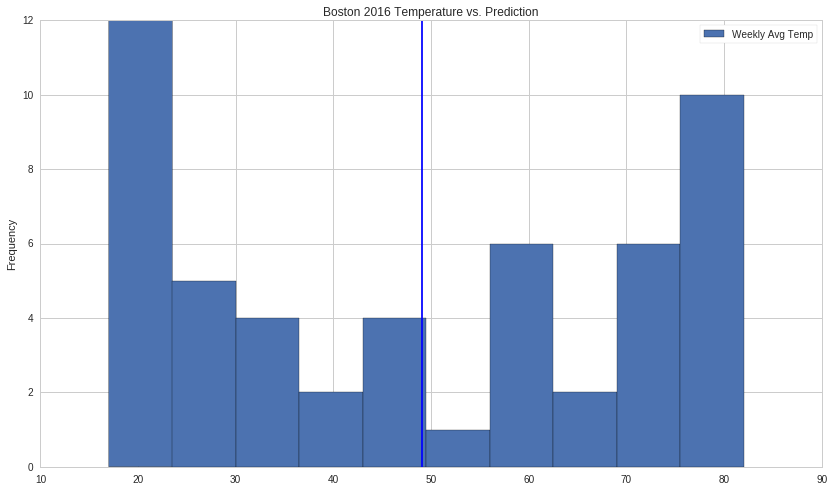

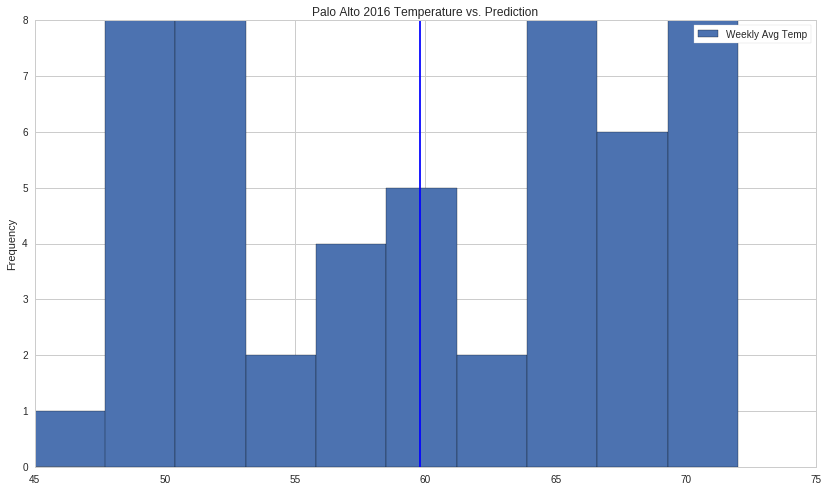

In [10]:
b16_df = pd.DataFrame([ 26.,  22.,  20.,  19.,  18.,  19.,  17.,  17.,  19.,  20.,  23., 22.,  28.,  28.,  35.,  38.,  42.,  47.,  49.,  56.,  59.,  61.,
        61.,  70.,  73.,  73.,  73.,  77.,  78.,  82.,  80.,  80.,  81., 78.,  82.,  78.,  76.,  71.,  69.,  66.,  60.,  63.,  56.,  50.,
        44.,  43.,  34.,  33.,  31.,  28.,  27.,  20.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

p16_df = pd.DataFrame([ 50.,  50.,  51.,  48.,  48.,  49.,  50.,  45.,  52.,  50.,  51., 52.,  50.,  56.,  58.,  55.,  61.,  56.,  61.,  62.,  62.,  64.,
        64.,  69.,  71.,  66.,  69.,  70.,  68.,  71.,  70.,  69.,  72., 71.,  66.,  69.,  70.,  70.,  66.,  67.,  64.,  64.,  65.,  61.,
        61.,  59.,  56.,  53.,  55.,  52.,  52.,  51.],
        columns = ['Weekly Avg Temp'],
        index = pd.date_range('1/1/2012', periods=52, freq='W'))

#Your code goes here

b16_df.plot.hist(title = "Boston 2016 Temperature vs. Prediction");
plt.axvline(b15_mean);

p16_df.plot.hist(title = "Palo Alto 2016 Temperature vs. Prediction");
plt.axvline(p15_mean);

b_avg_error = np.mean(abs(b16_df['Weekly Avg Temp'] - b15_mean))
p_avg_error = np.mean(abs(p16_df['Weekly Avg Temp'] - p15_mean))

print "Avg of Absolute Value of Prediction Error in Boston:", b_avg_error
print "Avg of Absolute Value of Prediction Error in Palo Alto:", p_avg_error

print "\nWe know from parts a and b that the weather in Boston is much more variable than that of Palo Alto. As a result, we can predict that an estimate based on a sample mean in Boston will be less accurate than an estimate based on a sample from Palo Alto, which is confirmed by this test. The Palo Alto predictions had a much lower error than those of Boston. With mean alone we would not have been able to make any conclusions about the accuracy of our predictions."


---

Congratulations on completing the instability of parameter estimates exercises!

As you learn more about writing trading models and the Quantopian platform, enter a daily [Quantopian Contest](https://www.quantopian.com/contest). Your strategy will be evaluated for a cash prize every day.

Start by going through the [Writing a Contest Algorithm](https://www.quantopian.com/tutorials/contest) tutorial.

*This presentation is for informational purposes only and does not constitute an offer to sell, a solic
itation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by Quantopian, Inc. ("Quantopian"). Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company.  In preparing the information contained herein, Quantopian, Inc. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. Quantopian makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.*